<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [4]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv("https://raw.githubusercontent.com/evangrinalds/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv")

df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [5]:
def parse(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [6]:
for i in range(len(df['description'])):
    df['description'].iloc[i] = parse(df['description'].iloc[i])
    
df = df.replace(r'//n',' ', regex=True)
df = df.replace("b'", '', regex=True)
df.head()

/Users/egrinalds/opt/anaconda3/envs/U4-S1-NLP-DS17/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"Job Description\n\nAs a Data Scientist 1, you ...",Data Scientist I
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist
4,4,Location: USA \xe2\x80\x93 multiple locations\...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [7]:
# Base
from collections import Counter
import re

import pandas as pd

# Plotting 
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [8]:
from spacy.tokenizer import Tokenizer

def tokenize(text):
    """Parses a string into a list of semantic units (words)
    
    Args: 
        text (str): The string that the function will tokenize.
        
    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [9]:
tokenizer = Tokenizer(nlp.vocab)

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['description'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [10]:
df.head()

,Unnamed: 0,description,title,tokens
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"[b""Job, Requirements:\nConceptual, understandi..."
1,1,"Job Description\n\nAs a Data Scientist 1, you ...",Data Scientist I,"[Job, Description\n\nAs, a, Data, Scientist, 1..."
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[As, a, Data, Scientist, you, will, be, workin..."
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$4,969, -, $6,756, a, monthContractUnder, the..."
4,4,Location: USA \xe2\x80\x93 multiple locations\...,Data Scientist,"[Location:, USA, \xe2\x80\x93, multiple, locat..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [11]:
data = df['description']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_features=1000)

# Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [13]:
dtm.head()

,000,10,100,2019,40,abilities,ability,able,academic,access,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## 4) Visualize the most common word counts

In [15]:
doc_len = [len(doc) for doc in data]

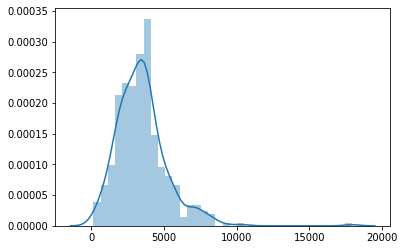

In [16]:
import seaborn as sns

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,04,10,100,1079302,11,12,125,14,15,...,yes,yeti,york,young,yrs,zenreach,zero,zeus,zf,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def tokenize_(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [19]:
# Tuning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize_)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,$,"$ 100,000",$ 300,$ 40,+,+ city,+ year,+ years\xe2\x80\x99,.\n\nabout,.\n\nabout role\n\nas,...,you\xe2\x80\x99ll partner,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,yrs,|,||
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.026647,0.0,0.029096,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.233205,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.133017,0.0,0.145245,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [20]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [21]:
NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [22]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[256]])

(array([[0.        , 1.26307708, 1.27270265, 1.27958262, 1.27958262]]),
 array([[256, 201, 410,  23, 123]]))

In [23]:
data[256][:200]

'Role Summary:\\nThe CCS Data Scientist is responsible for supporting the CCS digital service operations teams with data analytics that drive improved remote service efficiency and improved customer exp'

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 